In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import pandas as pd
from plotnine import *

%matplotlib inline

In [4]:
shop = pd.read_csv('201906_01.csv', 
                   encoding='UTF8', 
                   engine='python')
shop.shape

(565016, 39)

In [5]:
shop.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
3,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [6]:
shop['상권업종대분류명'].value_counts()

음식          183715
소매          177590
생활서비스        94104
학문/교육        42139
의료           25255
부동산          20460
관광/여가/오락     16283
숙박            5240
스포츠            230
Name: 상권업종대분류명, dtype: int64

In [7]:
shop['상권업종중분류명'].value_counts()

한식          59256
이/미용/건강     41871
종합소매점       35923
의복의류        32690
유흥주점        23876
            ...  
스포츠/운동         53
운영관리시설         18
유스호스텔          18
실외운동시설         10
부동산관련서비스        5
Name: 상권업종중분류명, Length: 94, dtype: int64

In [8]:
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
              '상권업종소분류명', '시도명', '시군구명', 
              '행정동명', '법정동명', '지번주소', '경도', '위도']
shop[view_columns].head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,127.047883,37.505675
1,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,126.899220,37.471711
2,싱싱커피&토스트,NaN,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘법동 578,128.980455,35.159774
3,와라와라호프,NaN,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,127.061026,37.493922
4,가락사우나내스낵,NaN,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,127.104071,37.500249


In [17]:
#한글폰트가 깨져서 폰트변경하기

import matplotlib as mpl
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [18]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

765


['DejaVu Sans Mono',
 'DejaVu Sans',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans Mono']

In [19]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [20]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

765


In [21]:
font_list[:10]

['C:\\Windows\\Fonts\\a자막체.ttf',
 'C:\\WINDOWS\\Fonts\\HYHWPEQ.TTF',
 'C:\\Windows\\Fonts\\LHANDW.TTF',
 'C:\\WINDOWS\\Fonts\\FRAHVIT.TTF',
 'C:\\Windows\\Fonts\\WINGDNG3.TTF',
 'C:\\WINDOWS\\Fonts\\PAPYRUS.TTF',
 'C:\\WINDOWS\\Fonts\\msyhl.ttc',
 'C:\\WINDOWS\\Fonts\\PERTILI.TTF',
 'C:\\WINDOWS\\Fonts\\trebucbd.ttf',
 'C:\\Windows\\Fonts\\Candarai.ttf']

In [22]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.3
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\나\.matplotlib
캐시 위치:  C:\Users\나\.matplotlib


In [23]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

[('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framd.ttf'),
 ('Franklin Gothic Heavy', 'C:\\WINDOWS\\Fonts\\FRAHV.TTF'),
 ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICB.TTF'),
 ('Franklin Gothic Heavy', 'C:\\Windows\\Fonts\\FRAHVIT.TTF'),
 ('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framdit.ttf'),
 ('Franklin Gothic Demi', 'C:\\WINDOWS\\Fonts\\FRADM.TTF'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunbd.ttf'),
 ('Yu Gothic', 'C:\\WINDOWS\\Fonts\\YuGothR.ttc'),
 ('Hancom Gothic', 'C:\\WINDOWS\\Fonts\\Hancom Gothic Bold.ttf'),
 ('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICBI.TTF'),
 ('Franklin Gothic Medium Cond', 'C:\\Windows\\Fonts\\FRAMDCN.TTF'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf'),
 ('Franklin Gothic Demi Cond', 'C:\\WINDOWS\\Fonts\\FRADMCN.TTF'),
 ('Showcard Gothic', 'C:\\WINDOWS\\Fonts\\SHOWG.TTF'),
 ('Copperplate Gothic Bold', 'C:\\Windows\\Fonts\\COPRGTB.TTF'),
 ('Franklin Gothic Demi', 'C:\\Windows\\Fonts\\FRADMIT.TTF'),
 ('Franklin Gothic Book', 'C:\\W

In [24]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [25]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (12,3)

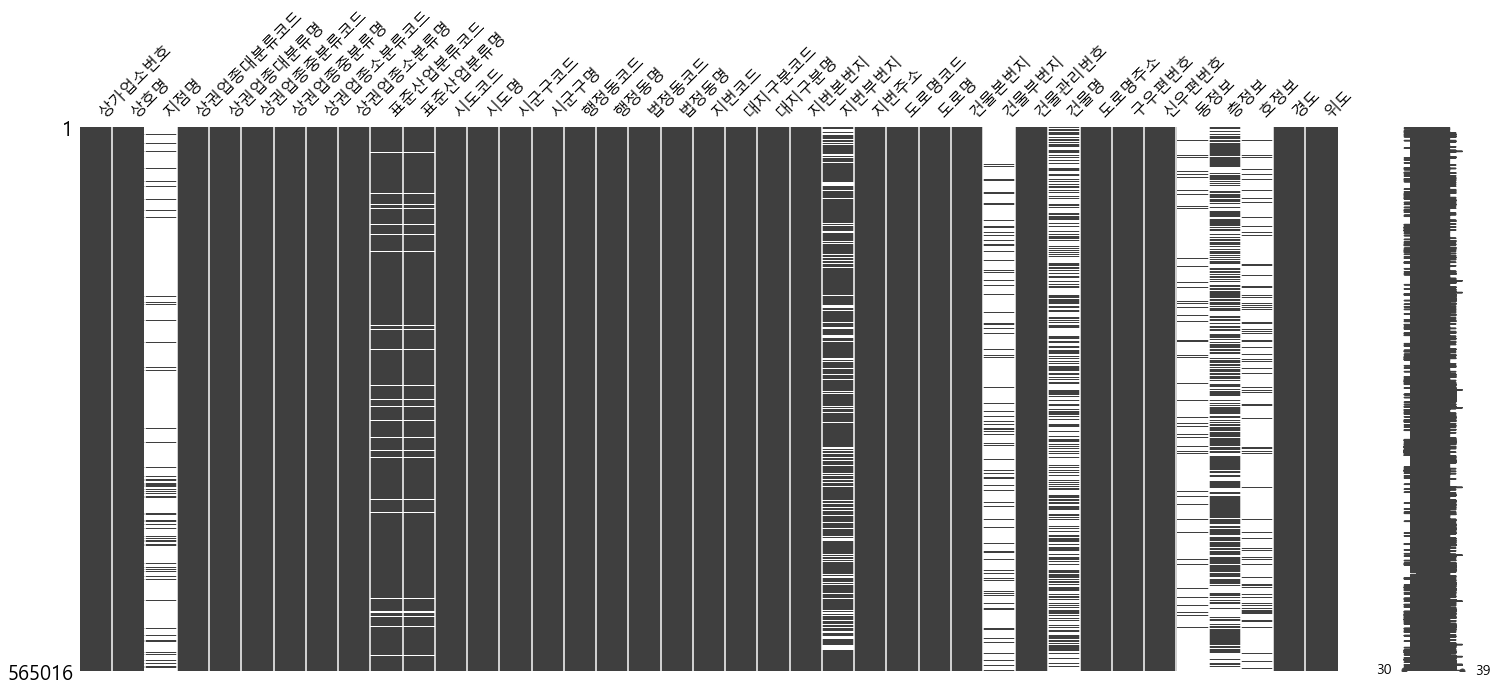

In [26]:
import missingno as msno

msno.matrix(shop)

In [10]:
shop.isnull().sum()

상가업소번호            0
상호명               1
지점명          489492
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      32952
표준산업분류명       32952
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         97123
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        494164
건물관리번호            0
건물명          303808
도로명주소             0
구우편번호             0
신우편번호             9
동정보          514802
층정보          220463
호정보          481880
경도                0
위도                0
dtype: int64

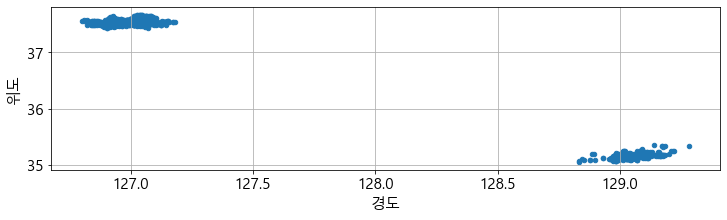

In [27]:
shop[:1000].plot.scatter(x='경도', y='위도', grid=True)

In [28]:
shop.loc[:5,['경도','위도']]

,경도,위도
0,127.047883,37.505675
1,126.899220,37.471711
2,128.980455,35.159774
3,127.061026,37.493922
4,127.104071,37.500249
5,127.088387,37.549245


In [29]:
shop.loc[:,'도로명주소'].head()
shop.loc[shop['도로명주소'].str.startswith('서울')].head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
5,19964615,석봉토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,1121510300100770047020647,NaN,서울특별시 광진구 자양로39길 20,143200,4992.0,NaN,1,NaN,127.088387,37.549245


In [30]:
shop.seoul=shop.loc[shop['도로명주소'].str.startswith('서울')]
shop.nonseoul=shop.loc[~shop['도로명주소'].str.startswith('서울')]
print(shop.seoul.shape)
print(shop.nonseoul.shape)

(401071, 39)
(163945, 39)


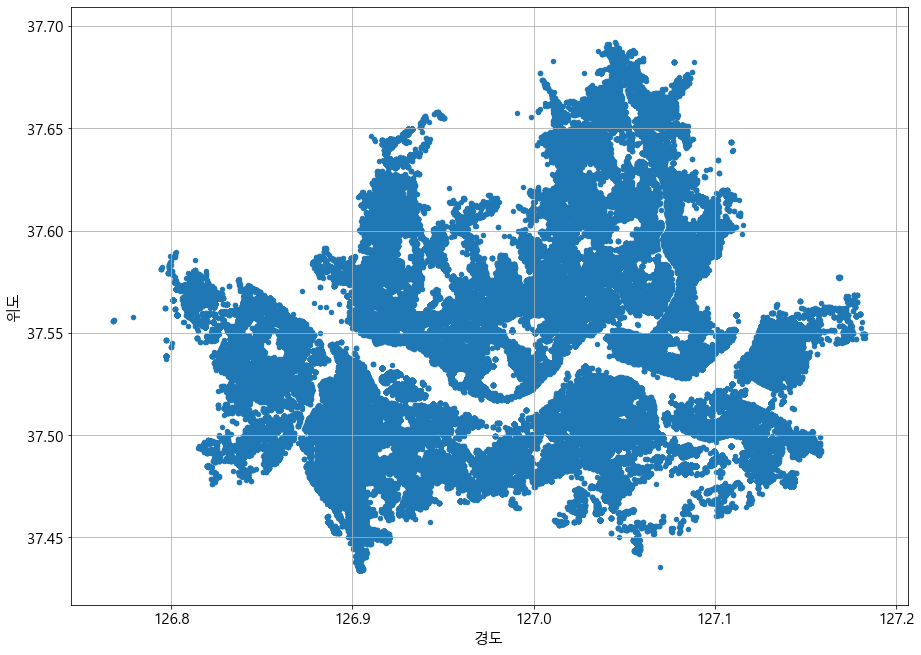

In [31]:
###서울 가게들을 위도 경도로 그래프상에 표현해보기
shop.seoul.plot.scatter(x='경도', y='위도',figsize=(15, 11),  grid=True)

In [34]:
print(shop.shape)
shop['시도'] = shop['도로명주소'].str.split(' ', expand=True)[0]
shop['구군'] = shop['도로명주소'].str.split(' ', expand=True)[1]
print(shop.shape)
shop.columns

(565016, 41)
(565016, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [35]:
shop.seoul = shop.loc[shop['도로명주소'].str.startswith('서울')]
shop.seoul.shape

(401071, 41)

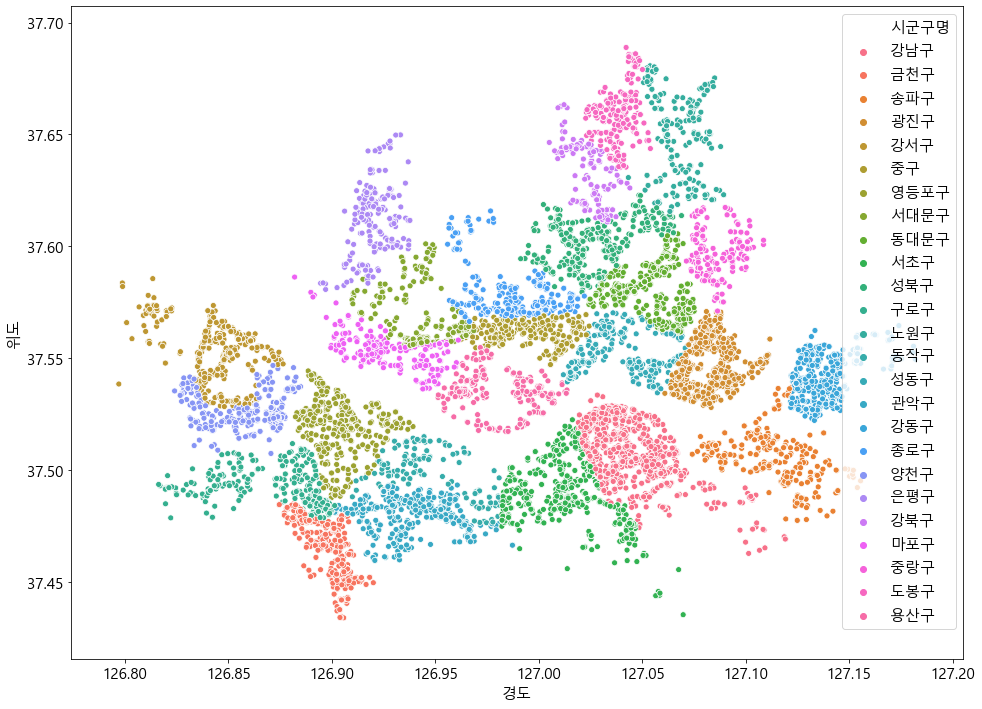

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop.seoul[:10000], x='경도', y='위도', hue='시군구명')


In [37]:
shop.seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

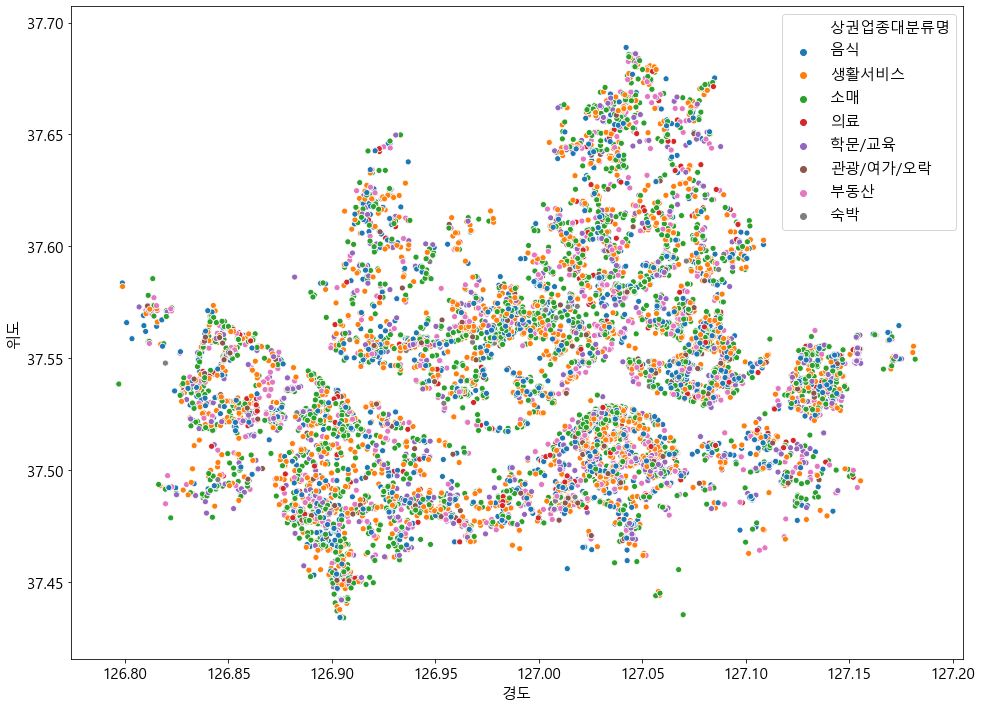

In [38]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop.seoul[:10000], x='경도', y='위도', hue='상권업종대분류명')

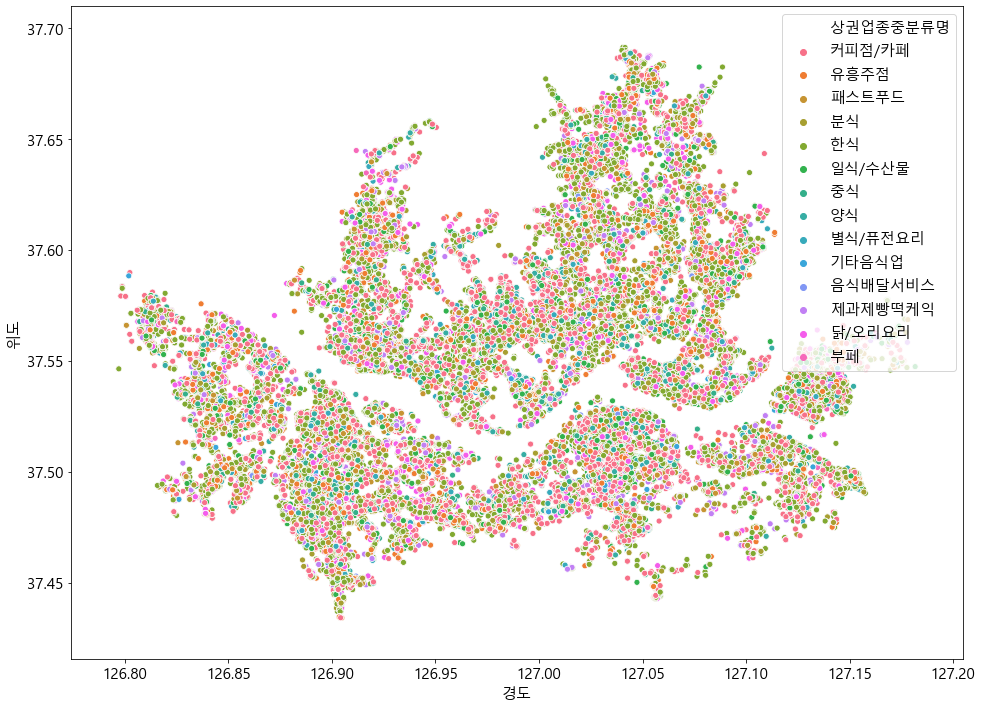

In [41]:
# 요식업 시각화 하기
shop.seoul.eat = shop.seoul[shop.seoul['상권업종대분류명'] == '음식']
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop.seoul.eat, x='경도', y='위도', hue='상권업종중분류명', 
                alpha='auto')

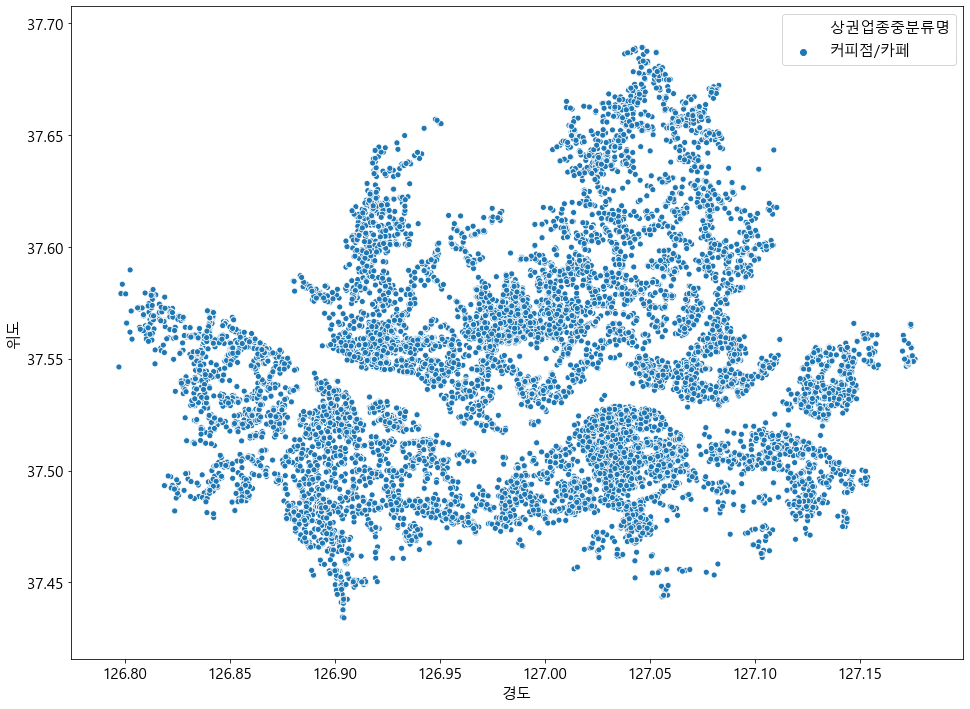

In [42]:
#카페 분포 시각화 하기
# 요식업 시각화 하기
shop.seoul.eat = shop.seoul[shop.seoul['상권업종중분류명'] == '커피점/카페']
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop.seoul.eat, x='경도', y='위도', hue='상권업종중분류명', 
                alpha='auto')